In [332]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import pandas as pd

In [333]:
def annotate_scatter_points(points,fig,ax):
    """
    Annotate scatter plot points with point numbers.

    Parameters:
    - points: List of (x, y) coordinates for scatter plot.

    Example:
    annotate_scatter_points([[0, 0], [1, 1], [2, 3], [2, 5]])
    """

    for i, (x, y) in enumerate(points, 1):
        ax.annotate(f'{i}', (x, y), textcoords="offset points", xytext=(5,5), ha='center')

# Example usage 'annotate_scatter_points([[0, 0], [1, 1], [2, 3], [2, 5]],fig,axeee)''

In [334]:
def extract_substances(dataframe):
    # Get the column names from the DataFrame
    columns = dataframe.columns

    # Create a dictionary to store the count of each unique substance
    substance_counts = {}

    # Extract unique substances from the column names and count occurrences
    for column in columns:
        # Split the column name based on the numeric part
        substance = ''.join([i for i in column[:-1]])
        
        # Update the count in the dictionary
        substance_counts[substance] = substance_counts.get(substance, 0) + 1

    # Convert the dictionary to two lists (substances and counts) and sort them
    unique_substances_list = sorted(list(substance_counts.keys()))
    counts_list = [substance_counts[substance] for substance in unique_substances_list]

    return unique_substances_list,counts_list

In [335]:
def get_fp_data(fpc_object,pcs = 2,gridpoints = np.arange(360)):
    """
    'Inputs'
    fpc_obj - functional data object already in pca form (1-D)
    pcs - number of functional principal components to take into account (int)
    
    'Outputs'
    np.arr - X array (gridpoints)
    np.arr 2D - Y arrays (data points - no. fpcs - 2 by default)
    """
    fpc_grid_points = fpc_object.components_.to_grid(gridpoints).grid_points[0]
    fpc_data_points = [np.zeros_like(fpc_grid_points) for i in range(pcs)]
    fpc_variance_exp = np.array([fpc_object.explained_variance_ratio_[i] for i in range(pcs)])
    for i in range(pcs):
        fpc_data_points[i] = fpc_object.components_.to_grid(gridpoints)[i].data_matrix[0].flatten()
        
    return fpc_grid_points,fpc_data_points,fpc_variance_exp

In [336]:
#define parameters
specie = {'E':'Erpobdella','G':'Gammarus','R':'Radix'}
specie_dim = {'E':'X','G':'Y','R':'Z'}

In [337]:
#locate files and load data for each species
directory = r'D:\VP\ARTICLE3\ArticleData'
data = {}
for s in specie:
    file = r'{}\{}_{}_i_data.csv'.format(directory,s,specie_dim[s])
    print(file)
    data.update({s:pd.read_csv(file)})

if 'm_data' in file:
    mean = True #if IGT should be false
else:
    mean = False

D:\VP\ARTICLE3\ArticleData\E_X_i_data.csv
D:\VP\ARTICLE3\ArticleData\G_Y_i_data.csv
D:\VP\ARTICLE3\ArticleData\R_Z_i_data.csv


In [338]:
#Data Transformations for data with camera calibration error
calibration_mean,calibration_IGT = {'E':{},'G':{},'R':{}},{s:{} for s in specie}

if mean: 
    rules = calibration_mean
else:
    rules = calibration_IGT

In [339]:
data['E'].head()

,1-2Dichloroethane0,1-2Dichloroethane1,1-2Dichloroethane2,1-chlorodecane0,2A10,2A11,4-octylphenol0,4-octylphenol1,124-Trichlorobenzene0,124-Trichlorobenzene1,...,Trifluralin1,Trifluralin2,Trifluralin3,Verapamil0,Verapamil1,Verapamil2,Zinc0,Zinc1,Zinc2,Zinc3
0,0.133216,0.155410,0.105804,0.007479,0.046528,0.100513,0.009506,0.009506,0.007821,0.016676,...,0.000000,0.007964,0.0,0.005905,0.0,0.013629,0.0,0.039724,0.035926,0.005814
1,0.197503,0.205303,0.097796,0.007274,0.076142,0.165830,0.011393,0.011393,0.007050,0.018434,...,0.005052,0.008045,0.0,0.005550,0.0,0.013543,0.0,0.032204,0.033850,0.005609
2,0.228928,0.271855,0.087572,0.006784,0.111444,0.255442,0.014767,0.014767,0.006614,0.021075,...,0.006306,0.007962,0.0,0.004490,0.0,0.013616,0.0,0.026898,0.046223,0.005037
3,0.260672,0.354205,0.074385,0.006800,0.156157,0.356129,0.016946,0.016946,0.006140,0.023814,...,0.007269,0.007775,0.0,0.000000,0.0,0.012178,0.0,0.026512,0.078248,0.004210
4,0.299697,0.432230,0.060215,0.006974,0.205188,0.460003,0.018443,0.018443,0.006701,0.026928,...,0.007362,0.007862,0.0,0.000000,0.0,0.011165,0.0,0.030568,0.120326,0.000000


In [340]:
all_columns = list(data['E'].columns)

In [341]:
for s in specie:
    df = data[s].copy()
    for key in rules[s]:
        df[df.columns[key]] = df[df.columns[key]] * rules[s][key]
    data[s] = df

In [342]:
#identify all used substances
substances,counts = extract_substances(data[[*data][0]])
for i in range(len(substances)): print('{}: {} repetitions'.format(substances[i],counts[i]))
subcounts = dict(zip(substances,counts))

1-2Dichloroethane: 3 repetitions
1-chlorodecane: 1 repetitions
124-Trichlorobenzene: 2 repetitions
2A1: 2 repetitions
4-octylphenol: 2 repetitions
A736: 3 repetitions
Acetone: 1 repetitions
Acide Acrylique: 3 repetitions
Aluminium: 2 repetitions
Anthracene: 2 repetitions
Benzene: 1 repetitions
Benzo(a)pyrene: 2 repetitions
Biphenyl: 1 repetitions
Carbaryl: 2 repetitions
Chlorothanolil: 3 repetitions
Chlorpyrifos: 2 repetitions
Cobalt: 1 repetitions
Copper: 8 repetitions
Cypermethrine: 2 repetitions
DDD(2-4): 3 repetitions
Dicofol: 2 repetitions
Dieldrin: 2 repetitions
H40: 3 repetitions
Hydrazine: 2 repetitions
Ibuprofen: 1 repetitions
Isodrin: 2 repetitions
L1000: 2 repetitions
Lindane: 1 repetitions
Mercury: 4 repetitions
Methomyl: 7 repetitions
Nitric Acid: 1 repetitions
Pentachlorophenol: 2 repetitions
PiperonylButoxide: 2 repetitions
Quinoxyfen: 3 repetitions
Soja: 2 repetitions
Tebufenozide: 2 repetitions
Tetrachloroethylene: 2 repetitions
Trichlorobenzene(123): 4 repetitions
Tri

### Careful - order of dictionaries is not the same

In [343]:
substances[:5]

['1-2Dichloroethane',
 '1-chlorodecane',
 '124-Trichlorobenzene',
 '2A1',
 '4-octylphenol']

In [344]:
#colours inspired from plotly
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
sns.set_palette(colors)
colors

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

In [345]:
#Define columns and y values for functional data analysis
cols = data[[*data][0]].columns
y = [col[:-1] for col in cols]
y

['1-2Dichloroethane',
 '1-2Dichloroethane',
 '1-2Dichloroethane',
 '1-chlorodecane',
 '2A1',
 '2A1',
 '4-octylphenol',
 '4-octylphenol',
 '124-Trichlorobenzene',
 '124-Trichlorobenzene',
 'A736',
 'A736',
 'A736',
 'Acetone',
 'Acide Acrylique',
 'Acide Acrylique',
 'Acide Acrylique',
 'alphaEndosulfan',
 'alphaEndosulfan',
 'alphaEndosulfan',
 'Aluminium',
 'Aluminium',
 'Anthracene',
 'Anthracene',
 'Benzene',
 'Benzo(a)pyrene',
 'Benzo(a)pyrene',
 'betaEndosulfan',
 'betaEndosulfan',
 'betaEndosulfan',
 'Biphenyl',
 'Carbaryl',
 'Carbaryl',
 'Chlorothanolil',
 'Chlorothanolil',
 'Chlorothanolil',
 'Chlorpyrifos',
 'Chlorpyrifos',
 'Cobalt',
 'Copper',
 'Copper',
 'Copper',
 'Copper',
 'Copper',
 'Copper',
 'Copper',
 'Copper',
 'Cypermethrine',
 'Cypermethrine',
 'DDD(2-4)',
 'DDD(2-4)',
 'DDD(2-4)',
 'Dicofol',
 'Dicofol',
 'Dieldrin',
 'Dieldrin',
 'H40',
 'H40',
 'H40',
 'Hydrazine',
 'Hydrazine',
 'Ibuprofen',
 'Isodrin',
 'Isodrin',
 'L1000',
 'L1000',
 'Lindane',
 'Mercury',
 

In [346]:
for x in range(len(cols)):
    print(y[x],cols[x])

1-2Dichloroethane 1-2Dichloroethane0
1-2Dichloroethane 1-2Dichloroethane1
1-2Dichloroethane 1-2Dichloroethane2
1-chlorodecane 1-chlorodecane0
2A1 2A10
2A1 2A11
4-octylphenol 4-octylphenol0
4-octylphenol 4-octylphenol1
124-Trichlorobenzene 124-Trichlorobenzene0
124-Trichlorobenzene 124-Trichlorobenzene1
A736 A7360
A736 A7361
A736 A7362
Acetone Acetone0
Acide Acrylique Acide Acrylique0
Acide Acrylique Acide Acrylique1
Acide Acrylique Acide Acrylique2
alphaEndosulfan alphaEndosulfan0
alphaEndosulfan alphaEndosulfan1
alphaEndosulfan alphaEndosulfan2
Aluminium Aluminium0
Aluminium Aluminium1
Anthracene Anthracene0
Anthracene Anthracene1
Benzene Benzene0
Benzo(a)pyrene Benzo(a)pyrene0
Benzo(a)pyrene Benzo(a)pyrene1
betaEndosulfan betaEndosulfan0
betaEndosulfan betaEndosulfan1
betaEndosulfan betaEndosulfan2
Biphenyl Biphenyl0
Carbaryl Carbaryl0
Carbaryl Carbaryl1
Chlorothanolil Chlorothanolil0
Chlorothanolil Chlorothanolil1
Chlorothanolil Chlorothanolil2
Chlorpyrifos Chlorpyrifos0
Chlorpyrifo

In [347]:
#custom legend handles
from matplotlib.lines import Line2D
legend_handles = [Line2D([0], [0], color=plot_colors[sub], label=sub) for sub in substances]

NameError: name 'plot_colors' is not defined

Text(0, 0.5, 'Normalised mean amplitude')

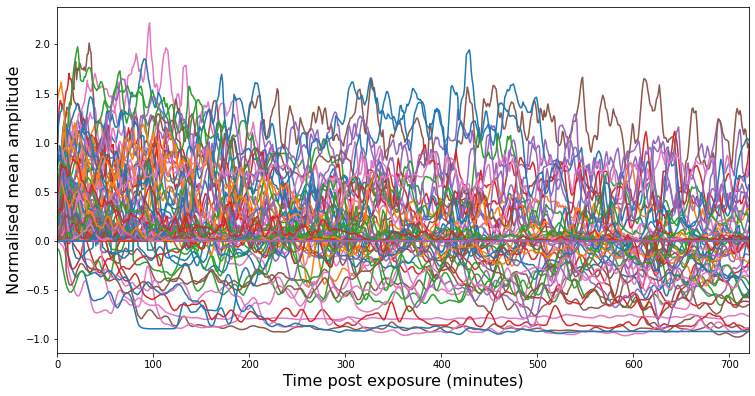

In [348]:
#plot for individual species
fig = plt.figure(figsize = (12,6))
axe = fig.add_axes([0.1,0.1,0.8,0.8])
sp = 'G'
for x,col in enumerate(data[sp].columns):
    axe.plot(data[sp].index,data[sp][col].values)
    
axe.set_xlim([0,720])

axe.set_xlabel('Time post exposure (minutes)',fontsize = 16)
axe.set_ylabel('Normalised mean amplitude',fontsize = 16)

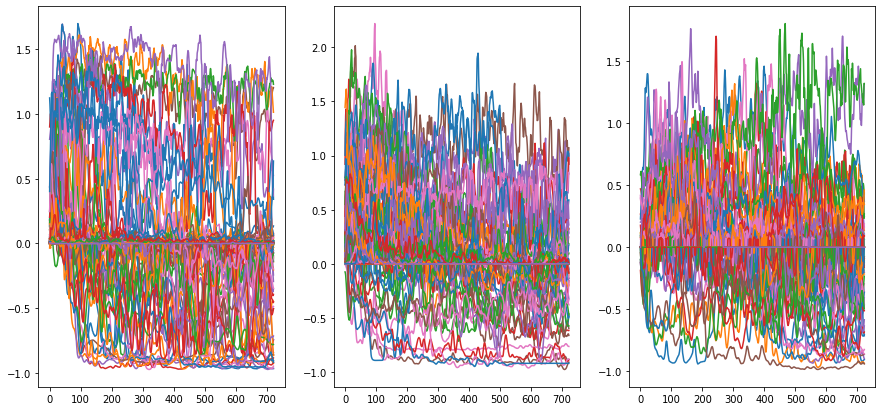

In [349]:
fig,axes = plt.subplots(1,3,figsize=(15,7))
for i,s in enumerate(specie):
    for x,col in enumerate(data[s].columns):
        axes[i].plot(data[s].index,data[s][col].values)

## Functional BSpline approx

In [350]:
from skfda.representation.grid import FDataGrid
from skfda.representation.basis import BSplineBasis

In [351]:
#Define timestep for data and extract first 2 hours (60 * 2 * 3) - timesteps 20s
timestep = 30
full_length = data[[*data][0]].shape[0]
#n_rows = (full_length//timestep)*timestep
n_rows = 540
#Cut dataframe at n_rows
for s in specie:
    data[s] = data[s].iloc[:n_rows]
    
data[s].shape

(540, 110)

In [352]:
#define FDA parameters with uneven knots
domain_range = (0,n_rows)
order = 4

#define knots with uneven spacing
knots = np.hstack((np.array([0,30,60,90]),np.arange(180,n_rows+90,90)))
#knots = np.hstack((np.array([0,30,60,90,120,150]),np.arange(180,181)))

n_basis = len(knots) + order - 2

bbs = BSplineBasis(domain_range = domain_range,n_basis = n_basis,order = order,knots = knots)
print('FDA knots')
knots

FDA knots


array([  0,  30,  60,  90, 180, 270, 360, 450, 540])

In [353]:
#define grid points and data matrices
grid_points = np.arange(n_rows)
data_matrices = {s:np.transpose(np.array(data[s].iloc[:n_rows])) for s in specie}

#define functional data grids
fds = {s:FDataGrid(data_matrix=data_matrices[s],grid_points=grid_points,) for s in specie}

In [354]:
#create basis functions
bss = BSplineBasis(domain_range = domain_range,n_basis = n_basis,order = order,knots = knots)
#bss_dt = bss.derivative()

In [355]:
#basis dictionary per species
X_bss = {s:fds[s].to_basis(bss) for s in specie}

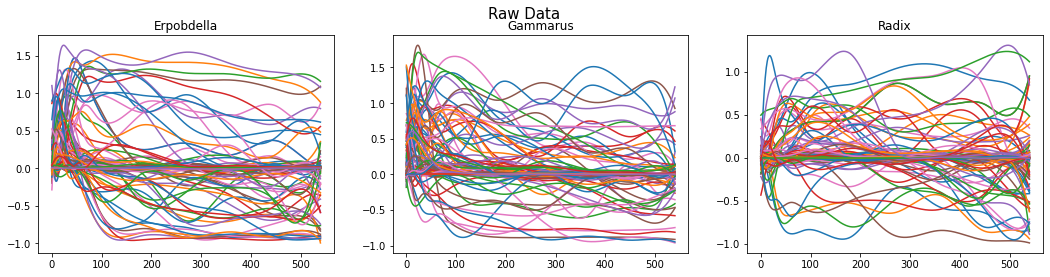

In [356]:
#plot b spline functinos
#sort colors error
fig,axe = plt.subplots(1,3,figsize = (18,4))
fig.suptitle('Raw Data',fontsize = 15)
for i,s in enumerate(specie): 
    X_bss[s].plot(axes = axe[i])
    axe[i].set_title(specie[s])

In [357]:
#bspline approximations as array
X_grid = {s:X_bss[s].to_grid(grid_points = np.arange(n_rows)) for s in specie}

In [358]:
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA

In [359]:
fpcas = {s: FPCA(n_components=4).fit(X_bss[s]) for s in specie}

Text(0.5, 1.0, 'Functional Principal Component plot')

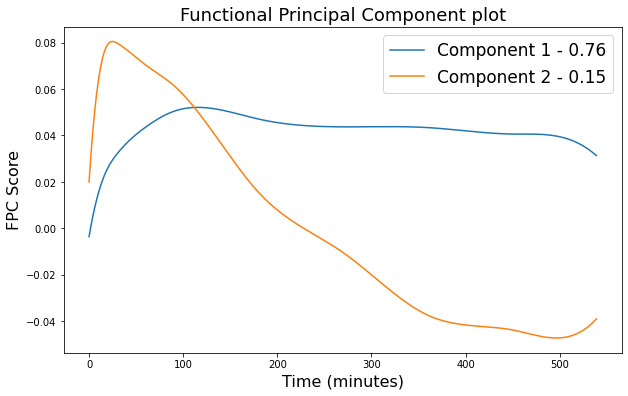

In [360]:
#Convert fpc1 and fpc2 to np.arrays
grid_points,data_points,variances = get_fp_data(fpcas['G'],gridpoints = np.arange(n_rows),pcs = 4)

#plot each component
fig,ax = plt.subplots(figsize = (10,6))
ax.plot(grid_points,data_points[0])
ax.plot(grid_points,data_points[1])
ax.legend(labels=['Component 1 - {:.2f}'.format(variances[0]),
                  'Component 2 - {:.2f}'.format(variances[1])],
         fontsize = 17)
ax.set_xlabel('Time (minutes)',fontsize = 16)
ax.set_ylabel('FPC Score',fontsize = 16)
ax.set_title('Functional Principal Component plot',fontsize = 18)

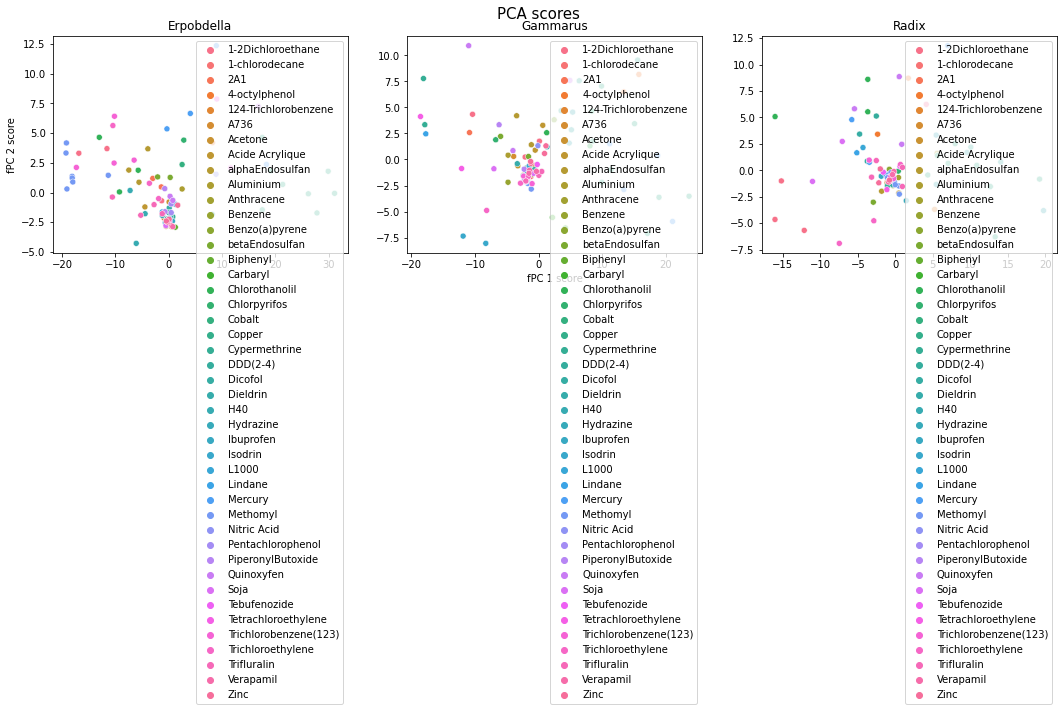

In [369]:
#Show all PCAs as FPCA scores plot
scores_dict = {s:fpcas[s].fit_transform(X_bss[s]) for s in specie}

fig_FPCA,ax_FPCA = plt.subplots(1,3,figsize=(18,4))
fig_FPCA.suptitle('PCA scores',fontsize = 15)

ax_FPCA[1].set_xlabel("fPC 1 score")
ax_FPCA[0].set_ylabel("fPC 2 score")

for i,s in enumerate(specie):
    sns.scatterplot(x=scores_dict[s][:, 0], y=scores_dict[s][:, 1],hue = y,ax = ax_FPCA[i])
    ax_FPCA[i].set_title(specie[s])  

#ax_meanFPCA.tick_params(labelsize = 13)
plt.show()

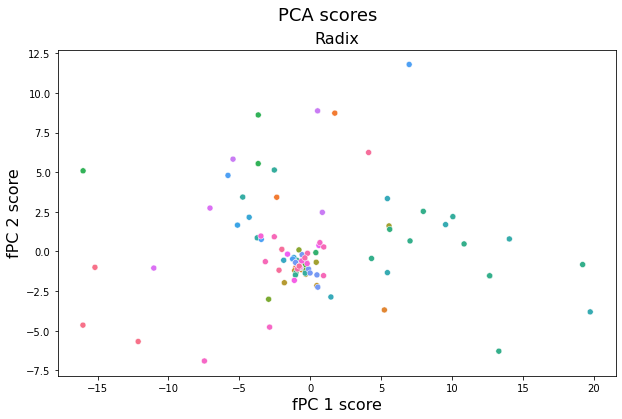

In [370]:
fig_FPCA,ax_FPCA = plt.subplots(figsize = (10,6))
fig_FPCA.suptitle('PCA scores',fontsize = 18)

ax_FPCA.set_xlabel("fPC 1 score",fontsize = 16)
ax_FPCA.set_ylabel("fPC 2 score",fontsize = 16)

sp = 'R'
sns.scatterplot(x=scores_dict[sp][:, 0], y=scores_dict[sp][:, 1],hue = y,ax = ax_FPCA,legend = False)
ax_FPCA.set_title(specie[sp],fontsize = 16)

#ax_meanFPCA.tick_params(labelsize = 13)
plt.show()

# Multidimensional

In [371]:
from skfda.representation.basis import VectorValuedBasis

In [372]:
data_vector_matrix = np.transpose(np.array([np.array(data[s].iloc[:n_rows]) for s in specie]))
vector_fd = FDataGrid(data_matrix=data_vector_matrix,grid_points=grid_points,)
vector_bss = VectorValuedBasis([bss for i in range(3)])
vector_bss = vector_fd.to_basis(vector_bss)

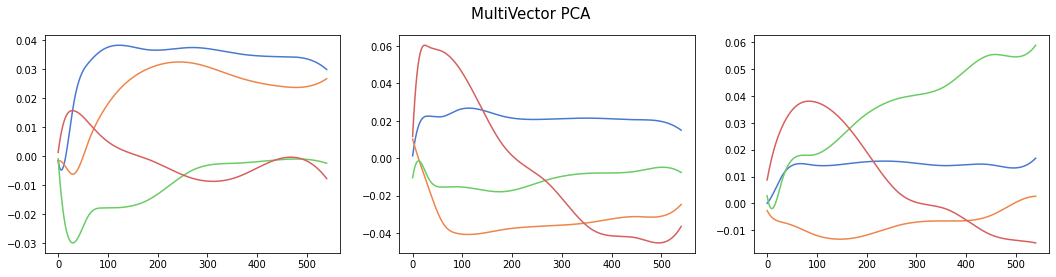

In [373]:
sns.set_palette('muted')
fig,axe = plt.subplots(1,3,figsize = (18,4))
fig.suptitle('MultiVector PCA',fontsize = 15)
vector_fpca = FPCA(n_components=4).fit(vector_bss)
vector_fpca.components_.plot(axes = axe)
plt.show()

In [374]:
#get explained variance?
#Convert fpc1 and fpc2 to np.arrays
grid_points,data_points,variances = get_fp_data(vector_fpca,gridpoints = np.arange(n_rows),pcs = 4)

In [375]:
variances

array([0.52760592, 0.18765483, 0.0956055 , 0.05820446])

In [376]:
variances.sum()

0.8690707036690034

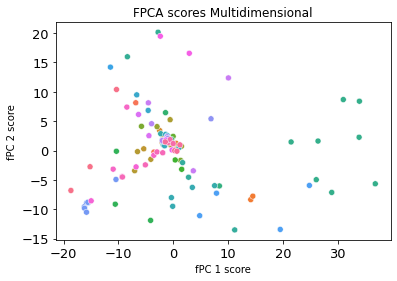

In [377]:
scores = vector_fpca.fit_transform(vector_bss)
fig_vector_FPCA,ax_vector_FPCA = plt.subplots(figsize=(6, 4))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1],hue = y,ax = ax_vector_FPCA,legend = False)
ax_vector_FPCA.set_xlabel("fPC 1 score")
ax_vector_FPCA.set_ylabel("fPC 2 score")
ax_vector_FPCA.set_title("FPCA scores Multidimensional")

ax_vector_FPCA.tick_params(labelsize = 13)
plt.show()

### Various scaling techniques

In [194]:
def log1p_scale(array):
    return np.sign(array) * np.log1p(np.abs(array))

In [195]:
def log_scale(array):
    return np.sign(array) * np.log(np.abs(array))

In [196]:
def sqrt1p_scale(array):
    return np.sign(array) * (np.sqrt(np.abs(array) + np.ones(shape = array.shape)) - np.ones(shape = array.shape))

In [197]:
def sqrt_scale(array):
    return np.sign(array) * np.sqrt(np.abs(array))

In [379]:
scoresPC1 = scores[:,0]
scoresPC2 = scores[:,1]
scoresPC3 = scores[:,2]
scoresPC4 = scores[:,3]

In [381]:
#logscaled data (log(1+x))
scores_PC1_log1 = log1p_scale(scoresPC1)
scores_PC2_log1 = log1p_scale(scoresPC2)
scores_PC3_log1 = log1p_scale(scoresPC3)
scores_PC4_log1 = log1p_scale(scoresPC4)

In [382]:
#logscaled data (log(x))
scores_PC1_log = log_scale(scoresPC1)
scores_PC2_log = log_scale(scoresPC2)
scores_PC3_log = log_scale(scoresPC3)
scores_PC4_log = log_scale(scoresPC4)

In [383]:
#sqrt data (sqrt(1+x))
scores_PC1_sqrt1 = sqrt1p_scale(scoresPC1)
scores_PC2_sqrt1 = sqrt1p_scale(scoresPC2)
scores_PC3_sqrt1 = sqrt1p_scale(scoresPC3)
scores_PC4_sqrt1 = sqrt1p_scale(scoresPC4)

In [384]:
#sqrt data (sqrt(x))
scores_PC1_sqrt = sqrt_scale(scoresPC1)
scores_PC2_sqrt = sqrt_scale(scoresPC2)
scores_PC3_sqrt = sqrt_scale(scoresPC3)
scores_PC4_sqrt = sqrt_scale(scoresPC4)

## Visualisations of Scaled Data Plots

**All score matrices are scaled at first**

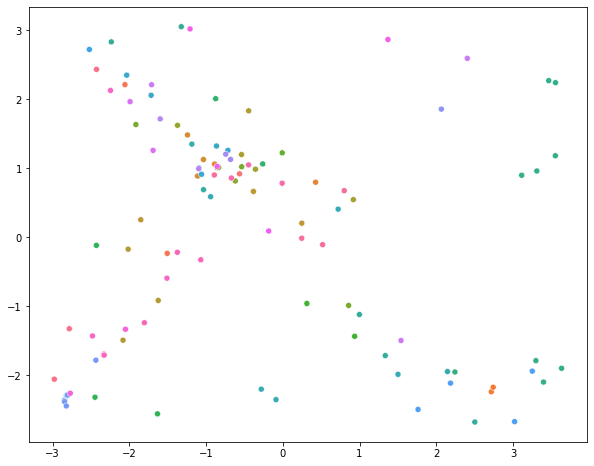

In [385]:
x_,y_ = scores_PC1_log1,scores_PC2_log1
transform = 'log(1+x)'
fig,ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=x_, y=y_,hue = y,ax = ax,legend = False)
ax_vector_FPCA.set_xlabel("fPC 1 score - {}".format(transform))
ax_vector_FPCA.set_ylabel("fPC 2 score - {}".format(transform))
ax_vector_FPCA.set_title("FPCA scores Multidimensional")

ax_vector_FPCA.tick_params(labelsize = 13)
plt.show()

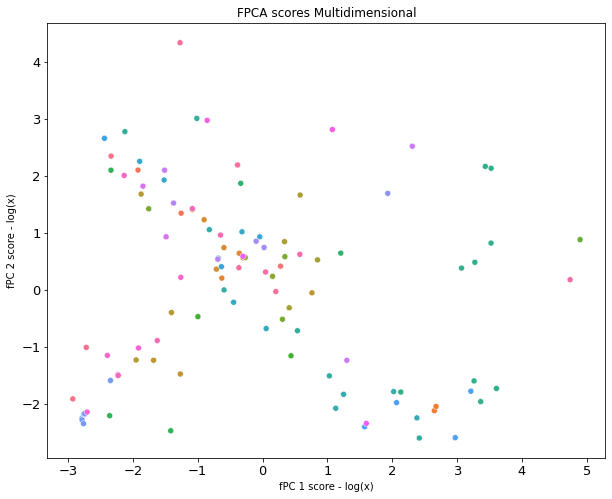

In [386]:
x_,y_ = scores_PC1_log,scores_PC2_log
transform = 'log(x)'
fig_vector_FPCA,ax_vector_FPCA = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=x_, y=y_,hue = y,ax = ax_vector_FPCA,legend = False)
ax_vector_FPCA.set_xlabel("fPC 1 score - {}".format(transform))
ax_vector_FPCA.set_ylabel("fPC 2 score - {}".format(transform))
ax_vector_FPCA.set_title("FPCA scores Multidimensional")

ax_vector_FPCA.tick_params(labelsize = 13)
plt.show()

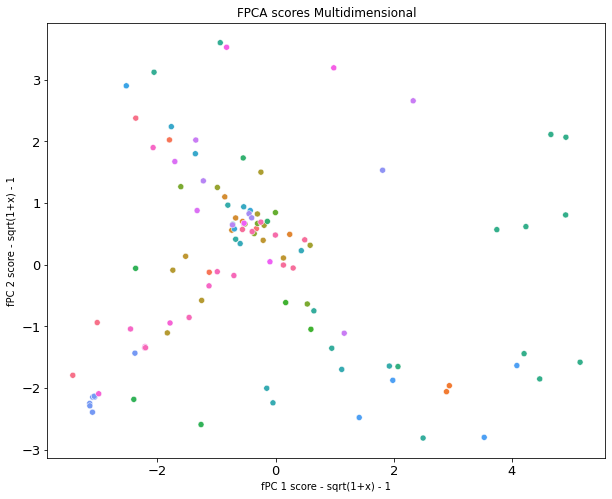

In [387]:
x_,y_ = scores_PC1_sqrt1,scores_PC2_sqrt1
transform = 'sqrt(1+x) - 1'
fig_vector_FPCA,ax_vector_FPCA = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=x_, y=y_,hue = y,ax = ax_vector_FPCA,legend = False)
ax_vector_FPCA.set_xlabel("fPC 1 score - {}".format(transform))
ax_vector_FPCA.set_ylabel("fPC 2 score - {}".format(transform))
ax_vector_FPCA.set_title("FPCA scores Multidimensional")

ax_vector_FPCA.tick_params(labelsize = 13)
plt.show()

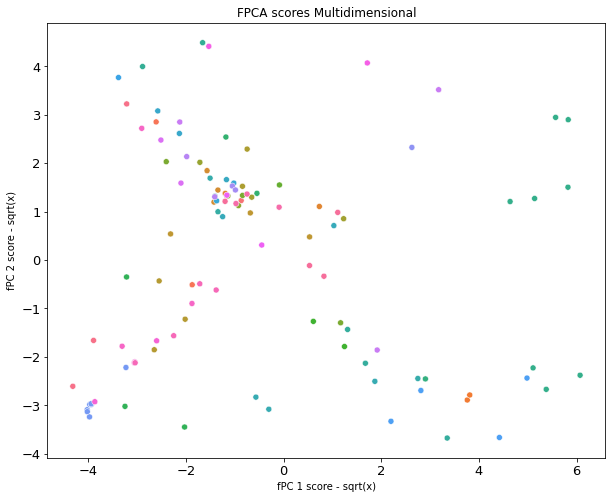

In [388]:
x_,y_ = scores_PC1_sqrt,scores_PC2_sqrt
transform = 'sqrt(x)'
fig_vector_FPCA,ax_vector_FPCA = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=x_, y=y_,hue = y,ax = ax_vector_FPCA,legend = False)
ax_vector_FPCA.set_xlabel("fPC 1 score - {}".format(transform))
ax_vector_FPCA.set_ylabel("fPC 2 score - {}".format(transform))
ax_vector_FPCA.set_title("FPCA scores Multidimensional")

ax_vector_FPCA.tick_params(labelsize = 13)
plt.show()

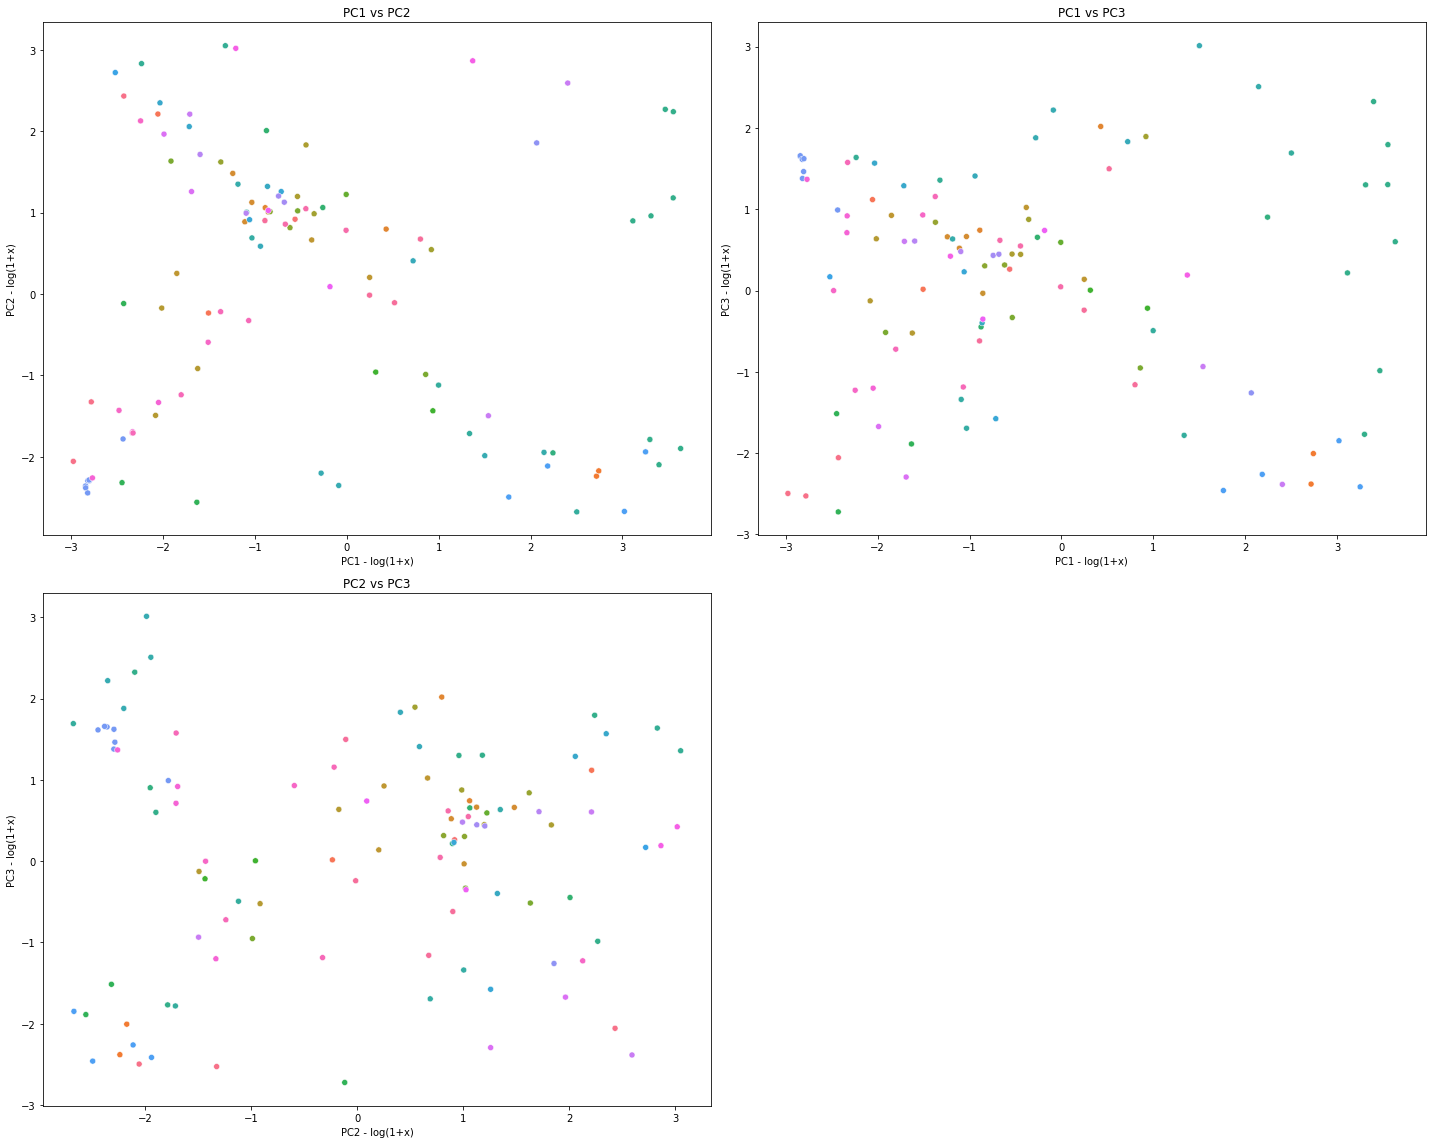

In [389]:
# Create a 2x2 subplot grid
x_,y_,z_ = scores_PC1_log1,scores_PC2_log1,scores_PC3_log1
transform = 'log(1+x)'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))

# Plot PC1 vs PC2 in the top-left subplot
sns.scatterplot(x=x_, y=y_,hue = y,ax = axes[0, 0],legend = False)
axes[0, 0].set_xlabel('PC1 - {}'.format(transform))
axes[0, 0].set_ylabel('PC2 - {}'.format(transform))
axes[0, 0].set_title('PC1 vs PC2')

# Plot PC1 vs PC3 in the top-right subplot
sns.scatterplot(x=x_, y=z_,hue = y,ax = axes[0, 1],legend = False)
axes[0, 1].set_xlabel('PC1 - {}'.format(transform))
axes[0, 1].set_ylabel('PC3 - {}'.format(transform))
axes[0, 1].set_title('PC1 vs PC3')

# Plot PC2 vs PC3 in the bottom-left subplot
sns.scatterplot(x=y_, y=z_,hue = y,ax = axes[1,0],legend = False)
axes[1, 0].set_xlabel('PC2 - {}'.format(transform))
axes[1, 0].set_ylabel('PC3 - {}'.format(transform))
axes[1, 0].set_title('PC2 vs PC3')

# Create an empty subplot in the bottom-right position
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## Feature extraction for Machine Learning

In [390]:
feature_directory = r'D:\VP\ARTICLE3\ML_paramaters'

In [391]:
#Save associated fPC variance
df_explained_variance = pd.DataFrame(index = ['Default','Erpobdella','Gammarus','Radix'],columns = ['fPC1','fPC2','fPC3','fPC4'],data = np.zeros((4,4)))
df_explained_variance.loc['Default'] = variances
for s in specie:
    grid_points,data_points,variances_s = get_fp_data(fpcas[s],gridpoints = np.arange(n_rows),pcs = 4)
    df_explained_variance.loc[specie[s]] = variances_s
    
df_explained_variance

,fPC1,fPC2,fPC3,fPC4
Default,0.527606,0.187655,0.095605,0.058204
Erpobdella,0.861219,0.080371,0.022752,0.011967
Gammarus,0.755667,0.147860,0.040593,0.017644
Radix,0.713442,0.184078,0.041747,0.022464


In [392]:
#save explained variance to directory
df_explained_variance.to_csv(r'{}\explained_variance.csv'.format(feature_directory))

**Create BSpline coefficient dataframes**

In [393]:
np.arange(n_basis)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [394]:
vector_bss.coefficients.shape

(110, 33)

In [395]:
#each row represents an observation
dfs_BSpline_coef = {}

cols = ['Repetition']
for s in specie:
    cols.extend(['{}{}'.format(s,i) for i in range(n_basis)])
    
#Vector Values B-Spline Coefficients
dfs_BSpline_coef.update({'Default':pd.DataFrame(columns = cols,index = np.arange(data['E'].shape[1]))})
dfs_BSpline_coef['Default']['Repetition'] = data['E'].columns.values
dfs_BSpline_coef['Default'][cols[1:]] = vector_bss.coefficients
dfs_BSpline_coef['Default'].head()

#Species Based B-Spline Coefficients
for s in specie:
    cols = ['Repetition']
    cols.extend(np.arange(n_basis))
    dfs_BSpline_coef.update({specie[s]:pd.DataFrame(columns = cols,index = np.arange(data['E'].shape[1]))})
    dfs_BSpline_coef[specie[s]]['Repetition'] = data['E'].columns.values
    dfs_BSpline_coef[specie[s]][cols[1:]] = X_bss[s].coefficients
    
dfs_BSpline_coef['Erpobdella']

,Repetition,0,1,2,3,4,5,6,7,8,9,10
0,1-2Dichloroethane0,0.074840,0.893535,0.112793,-0.263233,-0.389560,-0.782786,-0.744803,-0.986499,-0.851578,-0.989832,-0.918919
1,1-2Dichloroethane1,0.351615,0.510230,0.572593,0.062431,-0.279981,-0.406081,-0.690618,-0.764062,-0.490148,-0.879304,-0.350125
2,1-2Dichloroethane2,0.037323,0.290829,-0.084395,0.169107,-0.022515,0.067476,-0.049047,0.002175,-0.298045,-0.247243,0.101215
3,1-chlorodecane0,-0.003508,0.028829,0.005848,0.035053,0.048402,0.020079,0.036840,0.009779,0.034201,0.016733,0.029973
4,2A10,-0.027833,0.667950,0.269201,0.115367,-0.057040,0.060571,-0.119715,-0.278643,-0.247018,-0.336191,-0.105313
...,...,...,...,...,...,...,...,...,...,...,...,...
105,Verapamil2,0.012363,0.004596,0.009376,0.013398,0.002838,0.004929,0.049964,0.200647,-0.019085,0.016563,0.040846
106,Zinc0,-0.002181,0.019096,-0.017655,0.008790,0.006857,-0.022301,0.014297,-0.001754,0.013441,0.015697,0.007287
107,Zinc1,0.034778,0.048770,-0.018858,0.017689,0.003316,0.092164,-0.006860,0.020309,-0.009333,0.005985,0.000560
108,Zinc2,0.034431,0.207323,0.122635,-0.114885,0.410479,0.240598,-0.025541,0.055910,-0.003262,0.018223,0.008535


In [396]:
#save explained variance to directory
for key in dfs_BSpline_coef:
    dfs_BSpline_coef[key].to_csv(r'{}\B_Spline_coefficients_{}.csv'.format(feature_directory,key))

**Scores Dataframes**

In [412]:
#Save associated fPC variance
keys = ['Default','Erpobdella','Gammarus','Radix']
dfs_score = {key:pd.DataFrame(index = np.arange(data['E'].shape[1]),columns = ['Repetition','fPC1','fPC2','fPC3','fPC4']) for key in keys}

#Add scores matrices to the relevant variables
cols = dfs_score['Default'].columns
dfs_score['Default']['Repetition'] = data['E'].columns.values
dfs_score['Default'][cols[1:]] = scores

for s in specie:
    dfs_score[specie[s]]['Repetition'] = data['E'].columns.values
    dfs_score[specie[s]][cols[1:]] = scores_dict[s]

dfs_score['Erpobdella']

,Repetition,fPC1,fPC2,fPC3,fPC4
0,1-2Dichloroethane0,-16.822780,3.314517,0.731870,0.055600
1,1-2Dichloroethane1,-11.548807,3.701603,-0.637498,0.384087
2,1-2Dichloroethane2,-1.292656,-0.690182,1.136399,-0.023826
3,1-chlorodecane0,0.324928,-2.289428,-0.053331,0.252073
4,2A10,-2.955924,1.191468,0.776728,0.393754
...,...,...,...,...,...
105,Verapamil2,0.792003,-2.867714,-0.009785,-0.268437
106,Zinc0,-0.221585,-2.479213,-0.149167,0.195701
107,Zinc1,0.101040,-2.240306,0.242123,0.395345
108,Zinc2,1.714937,-1.059343,0.950073,1.634784


In [413]:
#save score variables to relevant dataframes
for key in dfs_score:
    dfs_score[key].to_csv(r'{}\fPCA_score_{}.csv'.format(feature_directory,key))